# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

**TASK: Create a pairplot that displays the relationships between the following columns:**

**TASK: Create a heatmap that displays the correlation between all the columns.**

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


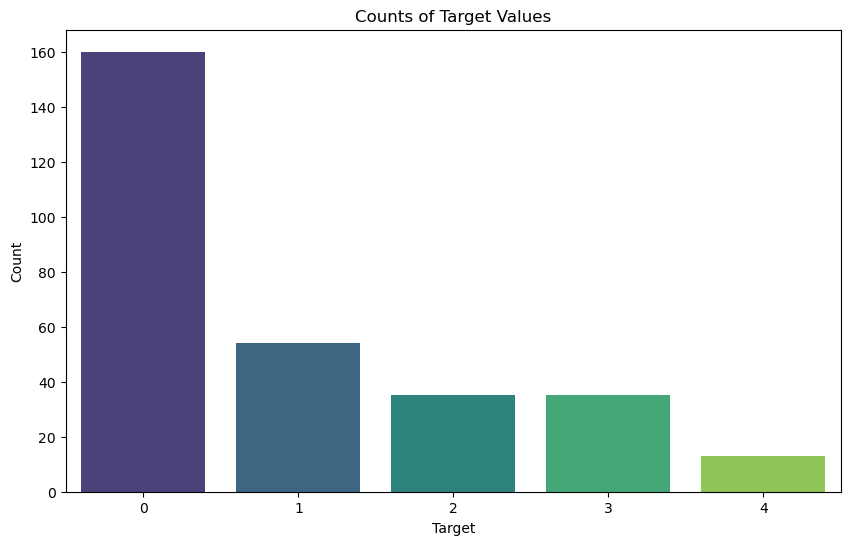

c:\Users\Ixia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ixia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ixia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ixia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

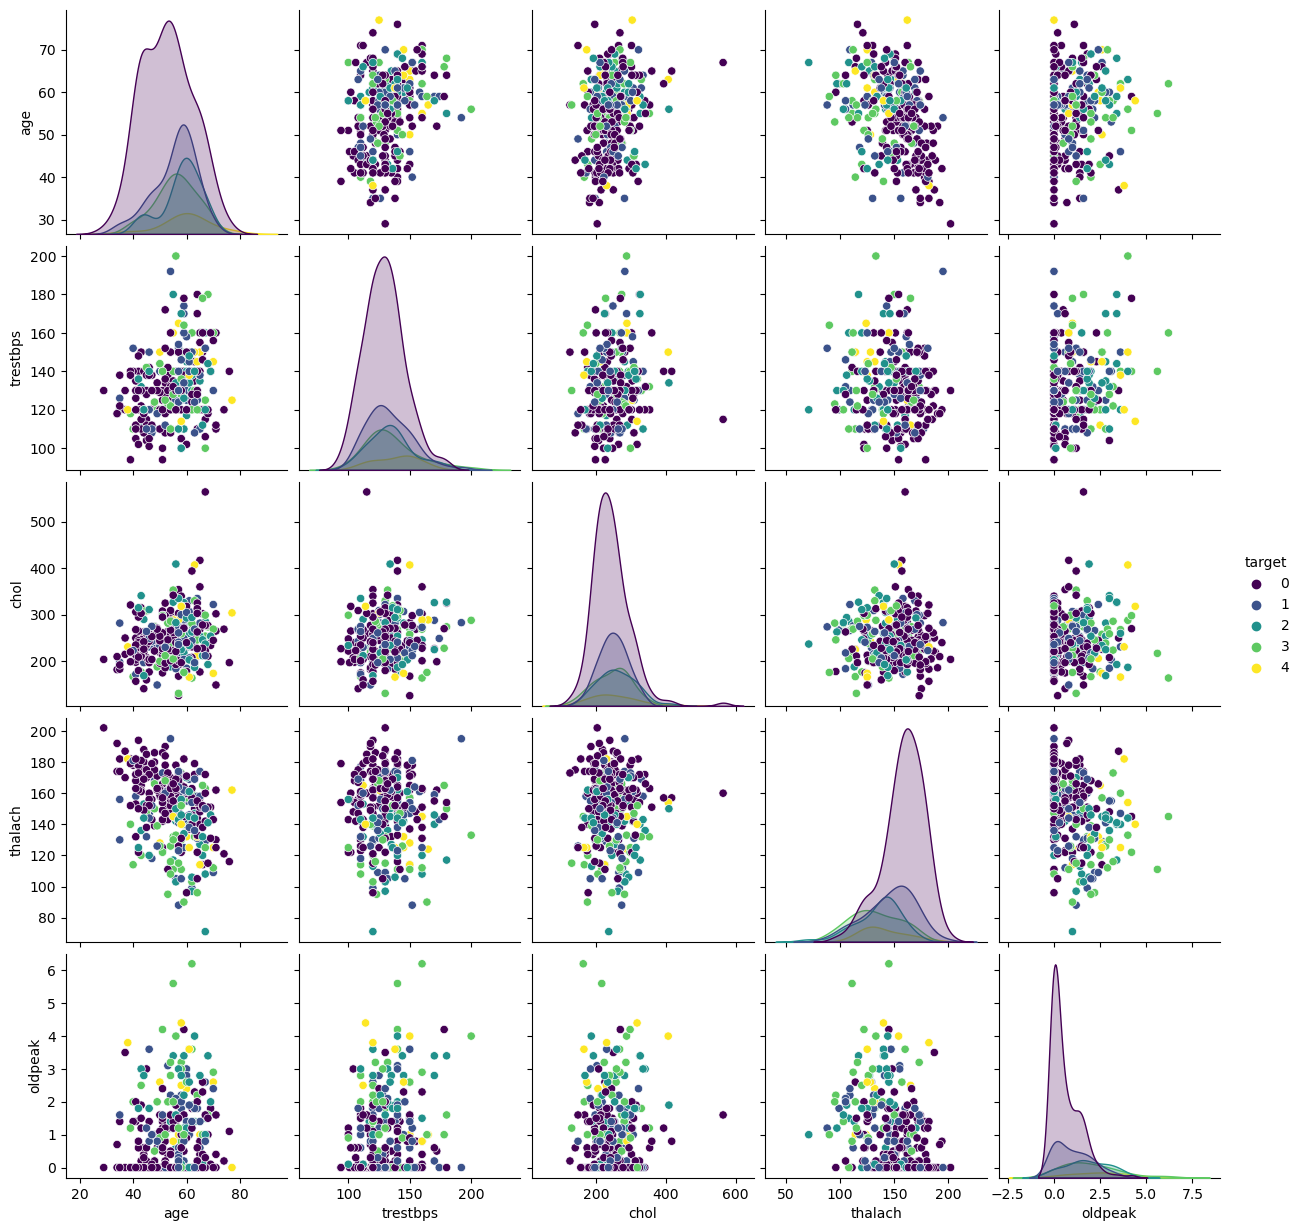

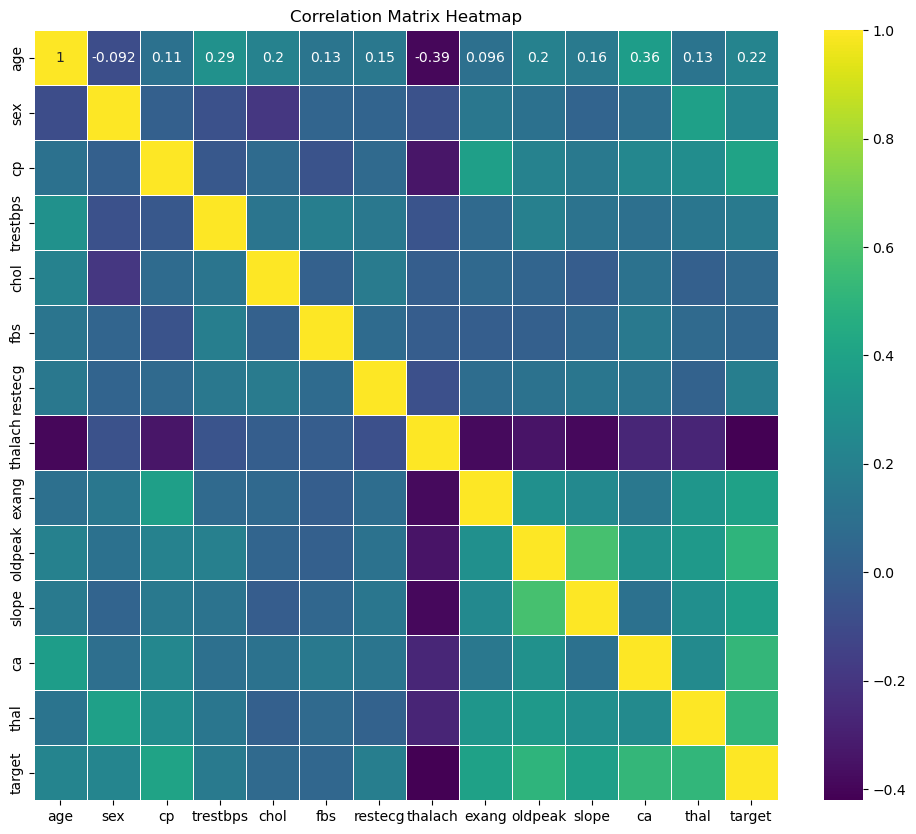

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the local file
file_path = 'processed.cleveland.data'
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(file_path, names=columns)

# Replace missing values marked by '?' with NaN and drop rows with NaN
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Convert numeric columns to appropriate data types
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Display the first few rows of the dataframe
print(df.head())

# Bar plot of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Counts of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Pairplot for selected columns
sns.pairplot(df, vars=["age", "trestbps", "chol", "thalach", "oldpeak"], hue='target', palette='viridis')
plt.show()

# Compute the correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

### Coeffecients

**TASK: Report back the model's coefficients.**

**Task: Create a visualization of the coefficients.**

The optimal C value is: 0.3593813663804626
          Coefficient
age         -0.060556
sex         -0.423086
cp          -0.642380
trestbps    -0.367553
chol        -0.138936
fbs          0.203743
restecg     -0.268631
thalach      0.437380
exang       -0.241733
oldpeak     -0.318429
slope       -0.307704
ca          -0.885214
thal        -0.604259
Intercept: 1.7407190090750475


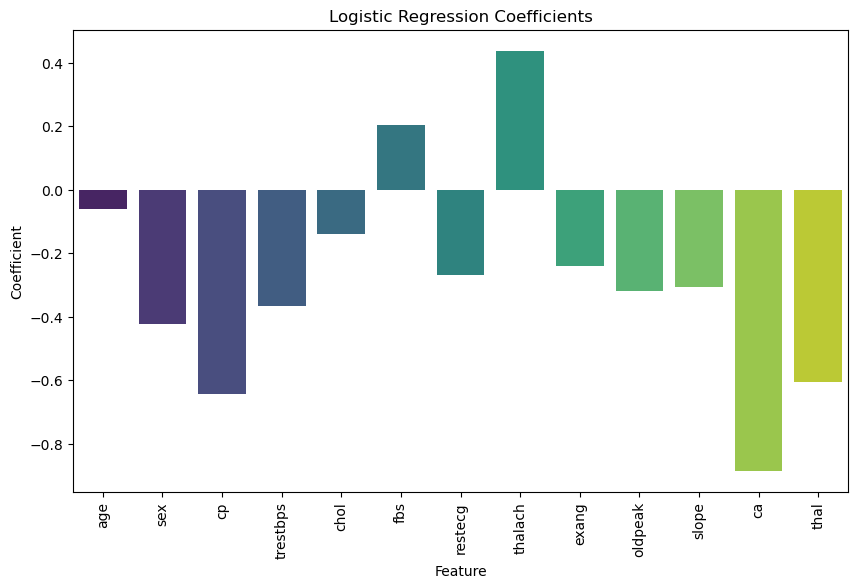

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'processed.cleveland.data'
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(file_path, names=columns)

df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col])

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=10000)

logreg_cv.fit(X_train, y_train)

best_c = logreg_cv.C_[0]
print(f"The optimal C value is: {best_c}")

coefficients = logreg_cv.coef_[0]
intercept = logreg_cv.intercept_[0]

coef_df = pd.DataFrame(coefficients, index=X.columns, columns=["Coefficient"])
print(coef_df)
print(f"Intercept: {intercept}")

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df.index, y="Coefficient", data=coef_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()


---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

Confusion Matrix:
 [[7 1 0 0]
 [3 2 1 1]
 [0 0 0 0]
 [0 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.29      0.40         7
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.60        15
   macro avg       0.34      0.29      0.29        15
weighted avg       0.68      0.60      0.60        15



c:\Users\Ixia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ixia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ixia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


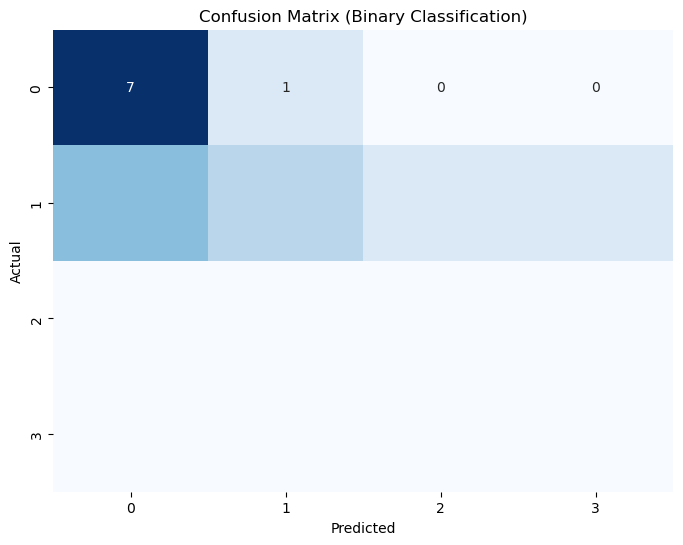

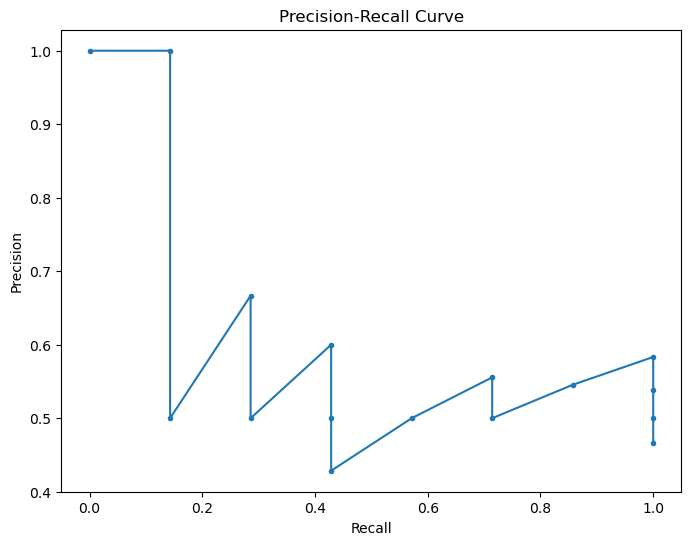

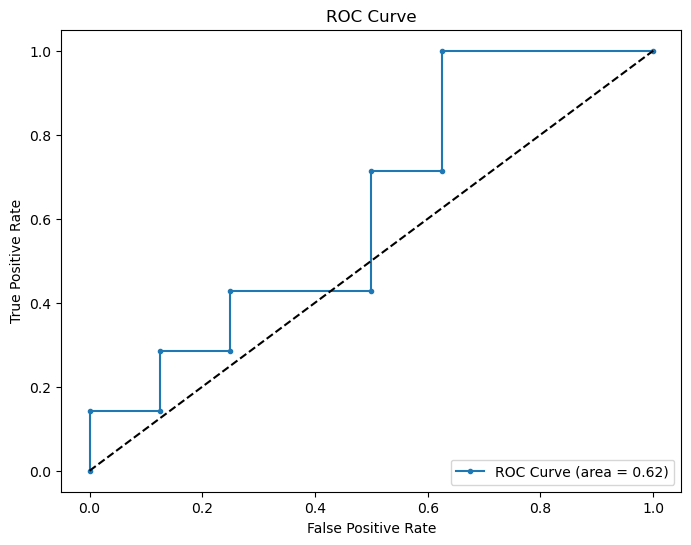

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'processed.cleveland.data'
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(file_path, names=columns)

df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col])

X = df.drop(columns=["target"])
y = df["target"]

y_binary = y.apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
y_test_binary = y_test.apply(lambda x: 1 if x > 0 else 0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=10000)

logreg_cv.fit(X_train, y_train)

y_pred_binary = logreg_cv.predict(X_test)
y_pred_proba_binary = logreg_cv.predict_proba(X_test)[:, 1]

conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix_binary)

class_report_binary = classification_report(y_test_binary, y_pred_binary)
print("Classification Report:\n", class_report_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba_binary)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba_binary)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
